In [ ]:
! pip install keras-ocr

https://pasaentuciudad.com.mx/remove-text-from-images-using-cv2-and-keras-ocr/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
from IPython.display import Image
pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read('/content/drive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png')
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
#print image with annotation and boxes
#keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])
Image(img)

plt.imshow(img)

In [ ]:
import math
import numpy as np
import cv2

In [ ]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [ ]:
#example of a line mask for the word "Tuesday"

In [ ]:
box = prediction_groups[0][0]

In [ ]:
x0, y0 = box[1][0]
x1, y1 = box[1][1] 
x2, y2 = box[1][2]
x3, y3 = box[1][3] 
        
x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

In [ ]:
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

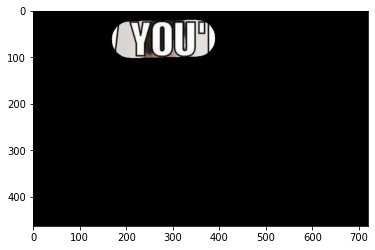

In [ ]:
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)

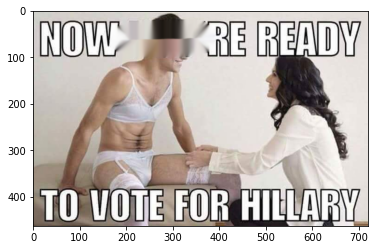

In [ ]:
img_inpainted = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
from PIL import Image

In [ ]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
def inpaint_text(img_path, pipeline):
    # read image
    # img = keras_ocr.tools.read(img_path)
    img = img_path

    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

        plt.imshow(img)
                 
    return(img)

In [ ]:
#show_image('/content/gdrive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png', width=300)

#show_image('/content/gdrive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png')

#display(inpaint_text('/content/gdrive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png',pipeline))

#pipeline = keras_ocr.pipeline.Pipeline()

#Image.open(inpaint_text('/content/gdrive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png',pipeline))

#imgg=inpaint_text('/content/drive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png',pipeline)
#Image('/content/gdrive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png')




In [ ]:
#img=inpaint_text('/content/gdrive/Shareddrives/team_MAMI/Labelled_Images/05nBEvh.png',pipeline)
#img2=inpaint_text('/content/drive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png',pipeline)

In [ ]:
#img2=inpaint_text('/content/drive/Shareddrives/team_MAMI/MAMI/TRIAL/Images/1012.jpg',pipeline)

In [ ]:
#plt.imshow(img2)

In [ ]:
from PIL import Image
import os, os.path

imgs = []
path = "/content/drive/Shareddrives/team_MAMI/MAMI/TRIAL/Images"
valid_images = [".jpg",".gif",".png",".tga"]

files = [f for f in os.listdir(path)]
final_output = [ str(i)+".jpg" for i in sorted([ int(num.split('.')[0]) for num in files])]
# print(final_output)

for f in final_output:

    ext = os.path.splitext(f)[1]
    # print(ext)
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))
    # print(Image.open(os.path.join(path,f)))


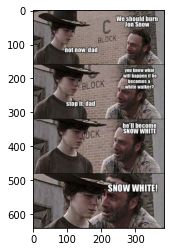

In [ ]:

#for i in imgs:
plt.imshow(imgs[0])  

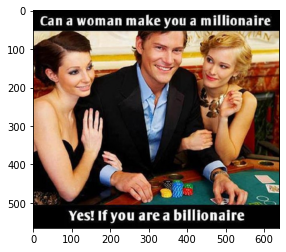

In [ ]:
plt.imshow(imgs[29])

In [ ]:
import os
 
# assign size
size = 0
 
# assign folder path
Folderpath = '/content/drive/Shareddrives/team_MAMI/MAMI/TRIAL/Images'
 
# get size
for path, dirs, files in os.walk(Folderpath):
    for f in files:
        fp = os.path.join(path, f)
        size += os.path.getsize(fp)
 
# display size
print("Folder size: " + str(size))



print(len('/content/drive/Shareddrives/team_MAMI/MAMI/TRIAL/Images'))
print(len('/content/drive/Shareddrives/team_MAMI/Labelled_Images'))

Folder size: 18933690
55
53


In [ ]:
#img=inpaint_text('/content/gdrive/Shareddrives/team_MAMI/Labelled_Images/05nBEvh.png',pipeline)


#for i in range(10):
  #plt.imshow(imgs[i]) 
  #hold=inpaint_text(imgs[i],pipeline)
  #plt.imshow(inpaint_text(imgs[i],pipeline))
  #plt.show()
#img2=inpaint_text('/content/drive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png',pipeline)

In [ ]:
#plt.imshow(imgs[9])
#/content/drive/Shareddrives/team_MAMI/MAMI/TRIAL/Images/1181.jpg

In [ ]:
from numpy import asarray

image_array = asarray(imgs[9])

# convert the images from imgs to array and pass them to inpaint_text()
inpaint_text(image_array,pipeline)

In [ ]:
import os
L=len(os.listdir('/content/drive/Shareddrives/team_MAMI/MAMI/TRIAL/Images'))

for i in range(L):
  
  image_array = asarray(imgs[i])

# convert the images from imgs to array and pass them to inpaint_text()
  #cv2.imwrite(f'/content/drive/Shareddrives/team_MAMI/MAMI/strippedImage/image_{i}.png',image_array)
  #/content/drive/Shareddrives/team_MAMI/MAMI/strippedImage
  hold=inpaint_text(image_array,pipeline)
  cv2.imwrite(f'/content/drive/Shareddrives/team_MAMI/MAMI/strippedImage/image_{i}.png',hold)
  #plt.imshow(imgs[i]) 
  #hold=inpaint_text(imgs[i],pipeline)
  #plt.imshow(inpaint_text(imgs[i],pipeline))
  plt.show()
#img2=inpaint_text('/content/drive/Shareddrives/team_MAMI/Labelled_Images/00DjNzR.png',pipeline)